<a href="https://colab.research.google.com/github/brigitayantie/Stock/blob/master/Stock_Exchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

#Get the stock symbols for the portfolio
#stockSymbols = ["FB","AMZN","AAPL","NFLX","GOOG"]

stockSymbols = ["FB","AMZN","AAPL","NFLX","GOOG"]

#Get the stock starting date
stockStartDate = '2013-01-01'

#GEt todays date format YYYY-mm-dd

today=datetime.today().strftime('%Y-%m-%d')

print(today)

#Get the number of asset in the portfolio
numAssets = len(stockSymbols)
print('You have '+str(numAssets)+ ' assets in your portfolio'  )

2020-03-25
You have 5 assets in your portfolio


In [ ]:
#Function get stock prices at the portfolio

def getMyPortfolio(stocks= stockSymbols,start=stockStartDate, end=today, col='Adj Close'):
  data=web.DataReader(stocks,data_source='yahoo',start=start,end=end)[col]
  return data
 
#Get the stock portfolio Adj. Close price
my_stocks=getMyPortfolio(stockSymbols)

my_stocks


Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.687538,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.820526,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.931404,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.543602,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.719994,13.880000,365.280823
...,...,...,...,...,...
2020-03-18,146.960007,1830.000000,246.669998,315.470001,1096.800049
2020-03-19,153.130005,1880.930054,244.779999,332.029999,1115.290039
2020-03-20,149.729996,1846.089966,229.240005,332.829987,1072.319946


In [ ]:
#Create a function to visualize the portfolio
# Create the title 'Portfolio (High,	Low,	Open,	Close,	Volume,	Adj Close) Price History
def showGraph(stocks= stockSymbols,start=stockStartDate, end=today, col='Adj Close'):
  title = 'Portfolio ' + col + ' Price History'
  #Get the stocks
  my_stocks = getMyPortfolio(stocks= stocks, start=start, end=end, col = col)
  
  # Visualize the price history
  plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5in 
  # Loop through each stock and plot the Adj Close for each day
  for c in my_stocks.columns.values:
    plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
  
  plt.title(title)
  plt.xlabel('Date',fontsize=18)
  plt.ylabel(col +' Price USD ($)',fontsize=18)
  plt.legend(my_stocks.columns.values, loc='upper left')
  plt.show()


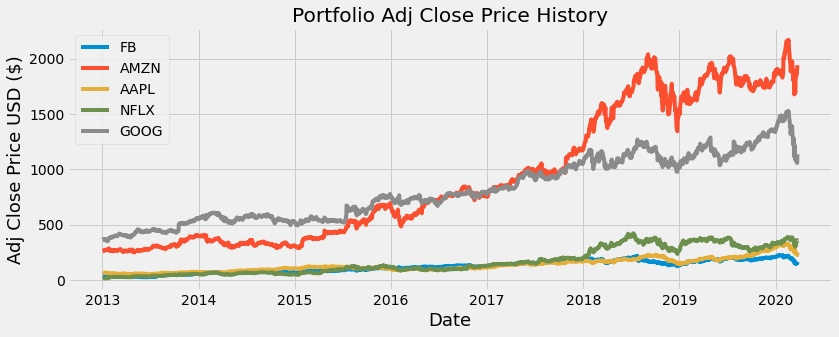

In [ ]:
#show Graph
showGraph(stockSymbols)

In [ ]:
#Calculate the simple returns 
#(new price/old price of that time period)-1

daily_simple_returns = my_stocks.pct_change(1)

#Show the daily simple returns /day/stock
daily_simple_returns



Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-03-18,-0.016464,0.012258,-0.024480,-0.013385,-0.020539
2020-03-19,0.041984,0.027831,-0.007662,0.052493,0.016858
2020-03-20,-0.022203,-0.018523,-0.063486,0.002409,-0.038528


In [ ]:
#Show the stock correlation 
# diagonal 1 have a perfect positive corelation

daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.496014,0.412639,0.341610,0.541621
AMZN,0.496014,1.000000,0.409789,0.427877,0.600229
AAPL,0.412639,0.409789,1.000000,0.238764,0.507288
NFLX,0.341610,0.427877,0.238764,1.000000,0.413474
GOOG,0.541621,0.600229,0.507288,0.413474,1.000000


In [ ]:
#Show covariance matrix for simple returns
#diagonal show spread volatility around mean
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000450,0.000199,0.000150,0.000211,0.000180
AMZN,0.000199,0.000358,0.000133,0.000236,0.000178
AAPL,0.000150,0.000133,0.000295,0.000120,0.000136
NFLX,0.000211,0.000236,0.000120,0.000850,0.000189
GOOG,0.000180,0.000178,0.000136,0.000189,0.000245


In [ ]:
#Show the variance
daily_simple_returns.var()

Symbols
FB      0.000450
AMZN    0.000358
AAPL    0.000295
NFLX    0.000850
GOOG    0.000245
dtype: float64

In [ ]:
#Print the standard deviation for daily simple return
print("The Stock volatility")
daily_simple_returns.std()


The Stock volatility


Symbols
FB      0.021224
AMZN    0.018909
AAPL    0.017179
NFLX    0.029154
GOOG    0.015647
dtype: float64

Text(0.5, 0, 'Date')

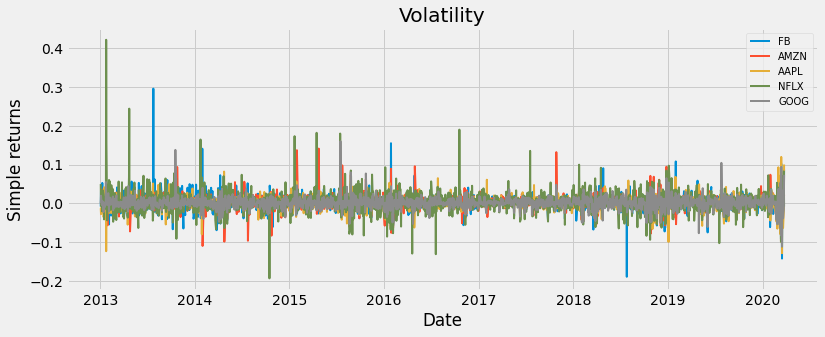

In [ ]:
#Visualize the stocks daily simple returns / volatility
plt.figure(figsize=(12,4.5))

#Loop through each stock and plot the simple returns
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)

#Create legend
plt.legend(loc='upper right', fontsize=10)
plt.title('Volatility')
plt.ylabel('Simple returns')
plt.xlabel('Date')


In [ ]:
#Show the mean of the daily simple return
dailyMeanSimpleReturns = daily_simple_returns.mean()

#Print
print("The daily mean simple return:")
print(dailyMeanSimpleReturns)



The daily mean simple return:
Symbols
FB      0.001185
AMZN    0.001290
AAPL    0.000852
NFLX    0.002227
GOOG    0.000753
dtype: float64


In [ ]:
#Calculate the expected portfolio daily return
randomWeights= np.array([0.4,0.1,0.3,0.1,0.1]) #40% FB, 10% AMZN, 30% AAPL, 10% NFLX, 10% GOOG

portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns * randomWeights)

#Print the expected portfolio return
print("The daily expected portfolio return: " + str(portfolioSimpleReturn))



The daily expected portfolio return: 0.0011565085024443427


In [ ]:
#Get yearly simple return
print("Expected yearly portfolio simple return: " + str(portfolioSimpleReturn * 253))


Expected yearly portfolio simple return: 0.2925966511184187
ERROR! Session/line number was not unique in database. History logging moved to new session 71


In [ ]:
#Calculate total return accumulative investment

dailyCumulSimpleReturn=(daily_simple_returns+1).cumprod()

#Show the cumulative simple returns
#( period_1+1 ) * next period (period_2 + 1) * (period_n +1)
dailyCumulSimpleReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987377,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959874,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954228,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956796,1.055972,1.013896
...,...,...,...,...,...
2020-03-18,5.248572,7.112044,3.591190,24.000543,3.044345
2020-03-19,5.468929,7.309977,3.563674,25.260406,3.095667
2020-03-20,5.347500,7.174575,3.337432,25.321268,2.976396


In [ ]:
(daily_simple_returns["GOOG"][1]+1)*(daily_simple_returns["GOOG"][2]+1)

1.0203525854692204

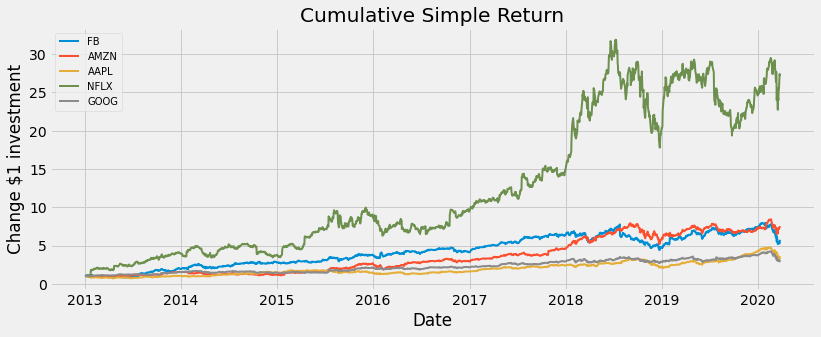

In [ ]:
#Visualize the daily cumulative simple return

plt.figure(figsize=(12.2,4.5))
for c in dailyCumulSimpleReturn.columns.values:
  plt.plot(dailyCumulSimpleReturn.index,dailyCumulSimpleReturn[c], lw=2, label=c)

  plt.legend(loc='upper left', fontsize=10)
  plt.xlabel('Date')
  plt.ylabel('Change $1 investment')
  plt.title('Cumulative Simple Return')
  plt.show
